# Yelp Star Prediction Based on Business Info#


**Motivation:**
- To give local restaurants suggestions about what stars they can get and how improve.
 

**Data Gathering and Preparation:**
- We first tried to scrape restaurant information directly from Yelp websites, but encountered prevention (I.P. ban) from Yelp website
- So, our data source: Yelp Dataset (with 63,738 restaurants in the U.S.)
- 60 attributes for each restaurnt 
- Used SQL-based R language to preprocess the data:
   - Filter out restaurants from all business
   - Merge and combine complementary columns



In [ ]:
import csv
from random import randint
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
import graphviz
import matplotlib.pyplot as plt

In [ ]:
#load the data
filename2='data_2.csv'
features=pd.read_csv(filename2,index_col=0,low_memory=False)
df = pd.read_csv('data_2.csv', index_col=0)
df.head()

D:\Users\siyi\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


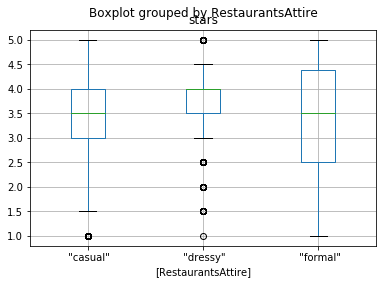

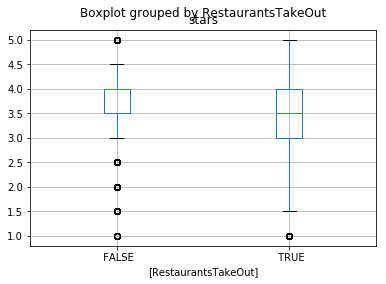

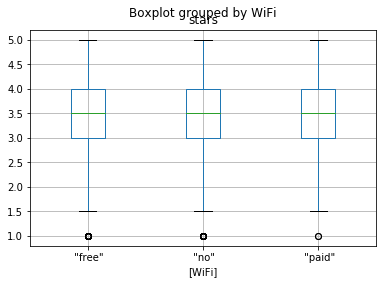

In [4]:
df[['stars', 'RestaurantsAttire']].boxplot(by = 'RestaurantsAttire')
df[['stars', 'RestaurantsTakeOut']].boxplot(by = 'RestaurantsTakeOut')
df[['stars', 'WiFi']].boxplot(by = 'WiFi')
plt.show()

In [ ]:
features=features.set_index(features['id'])
stars=features['stars']
features=features.drop(['id'],axis=1)
features=features.drop(['stars'],axis=1)
names=list(features.columns.values)

In [6]:
names

['review_count',
 'breakfast',
 'lunch',
 'brunch',
 'dinner',
 'AgesAllowed',
 'BusinessAcceptsCreditCards',
 'ByAppointmentOnly',
 'HasTV',
 'RestaurantsAttire',
 'glutenFree',
 'soyFree',
 'WiFi',
 'valet',
 'OutdoorSeating',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsTakeOut',
 'RestaurantsPriceRange',
 'RestaurantsReservations',
 'RestaurantsCounterService',
 'RestaurantsTableService',
 'GoodForKids',
 'GoodForDancing',
 'latenight',
 'vegan',
 'vegetarian',
 'classy',
 'trendy',
 'BusinessAcceptsBitcoin',
 'BikeParking',
 'casual',
 'touristy',
 'NoiseLevel',
 'DogsAllowed',
 'intimate',
 'Caters',
 'Alcohol',
 'no_music',
 'validated',
 'street',
 'lot',
 'hipster',
 'DriveThru',
 'HappyHour',
 'background_music',
 'Smoking',
 'WheelchairAccessible',
 'video',
 'wednesday',
 'upscale',
 'BYOB',
 'BYOBCorkage',
 'CoatCheck',
 'Corkage',
 'divey',
 'halal',
 'jukebox',
 'karaoke',
 'kosher',
 'live']

Convert categorical features into dummies

In [ ]:
# Parse the data parameters
features=features.drop(['AgesAllowed'],axis=1)
#features['review_count']=restaurant['review_count']

features=features.fillna(0.5)
features=features.replace(to_replace=' FALSE', value=0)
features=features.replace(to_replace=' TRUE', value=1)
features=features.replace(to_replace=' list', value=0)

features=features.replace(to_replace=' "beer_and_wine"', value=1)
features=features.replace(to_replace=' "none"', value=1)
features=features.replace(to_replace=' "full_bar"', value=2)

features=features.replace(to_replace= ' "casual"', value=1)
features=features.replace(to_replace= ' "dressy"', value=2)
features=features.replace(to_replace= ' "formal"', value=2)

features=features.replace(to_replace= ' "free"', value=1)
features=features.replace(to_replace= ' "no"', value=0)

features=features.replace(to_replace= ' "outdoor"', value=2)
features=features.replace(to_replace= ' "yes"', value=1)
features=features.replace(to_replace= ' "yes_free"', value=12)
features=features.replace(to_replace= ' "yes_corkage"', value=11)

features=features.replace(to_replace= ' TRUE FALSE', value=0)
features=features.replace(to_replace= ' FALSE TRUE', value=0)
features=features.replace(to_replace= ' TRUE TRUE', value=1)
features=features.replace(to_replace= ' FALSE FALSE', value=0)

features=features.replace(to_replace= ' "paid"', value=5)

stars=stars.replace(to_replace= 'continuous', value=0)

features=features.replace(to_replace= ' "average"', value=3)
features=features.replace(to_replace= ' "loud"', value=2)
features=features.replace(to_replace= ' "quiet"', value=4)
features=features.replace(to_replace= ' "very_loud"', value=1)
features=features.replace(to_replace= 'continuous', value=0)

**Supervised Learning Problem:** Classification of restaurant ratings with 5 classes



**Model:** Train differnt models to fit the data and implement cross validation for each model

- Decision tree
- Random Forest
- Boosting tree
- Adatree
- kNN
- Guassian mixture model

In [ ]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(features.astype('float'), 
                                                                     stars.astype('int'), test_size=0.2, random_state=0)
tree = DecisionTreeClassifier(max_depth=8)
RFtree=RandomForestRegressor(n_estimators=50,max_depth=8)
Boosttree=GradientBoostingClassifier(n_estimators=50,max_depth=7)
ADAtree=AdaBoostClassifier(n_estimators=30,learning_rate=1)

In [9]:
#  
score=[]
for dep in range(5,40):
    
    tree = DecisionTreeClassifier(max_depth=dep)
    tree.fit(X_train, y_train)
    score.append(tree.score(X_test, y_test))    

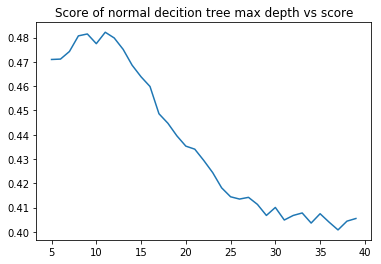

In [10]:
plt.figure()
plt.title('Score of normal decition tree max depth vs score')

plt.plot(range(5,40),score)
plt.show()

In [22]:
score=[]
for dep in range(5,40):
    
    RFtree=RandomForestRegressor(n_estimators=15,max_depth=dep)
    RFtree.fit(X_train, y_train)
    score.append(RFtree.score(X_test, y_test))


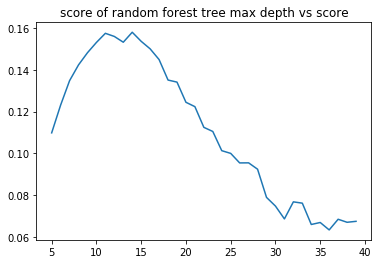

In [23]:
plt.figure()
plt.title('score of random forest tree max depth vs score')

plt.plot(range(5,40),score)
plt.show()

In [24]:
score

[0.10982547568494072,
 0.12313981747411573,
 0.1348477426271435,
 0.14242211371744018,
 0.14826131635502149,
 0.15318841001113159,
 0.15756819104659359,
 0.15606467671636126,
 0.15329759141862587,
 0.15808083628514913,
 0.15372487712979699,
 0.15011976318505238,
 0.14497371792890001,
 0.13514868095372423,
 0.13416423366967323,
 0.12448843876713034,
 0.12239842899435747,
 0.11246961957389945,
 0.11048902288720341,
 0.10128481282554191,
 0.09998033832037756,
 0.095411238748346228,
 0.095445056887518365,
 0.092395100555165977,
 0.078875387035141853,
 0.074707090273457344,
 0.068558039468423981,
 0.076733698084040292,
 0.076109831794605731,
 0.06588207293374837,
 0.066837857314814175,
 0.063278620627150839,
 0.068389328896024781,
 0.06694076320275244,
 0.06739761915149356]

In [25]:
knnscore=[]
for neighbor in range(1,15):
    KNN = KNeighborsClassifier(n_neighbors=neighbor)
    KNN.fit(X_train, y_train) 
    knnscore.append(KNN.score(X_test, y_test))

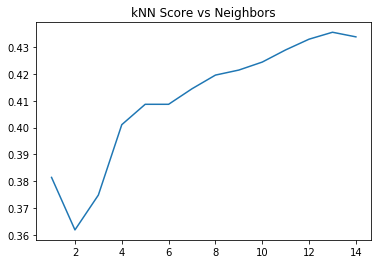

In [26]:
plt.figure()
plt.title('kNN Score vs Neighbors')
plt.plot(range(1,15),knnscore)
plt.show()

('R^2 = ', array([ 0.5064711 ,  0.50274553,  0.49913712,  0.50874716,  0.49811706]))


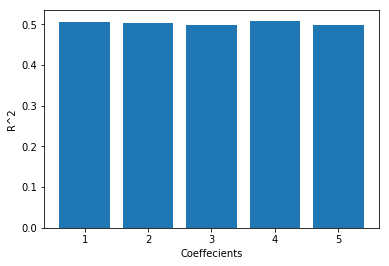

In [27]:
boostscores=cross_val_score(Boosttree,features.astype('float'),stars.astype('int'), cv=5,n_jobs=4)
print ('R^2 = ', boostscores)

plt.bar(range(1,6), boostscores)
plt.xlabel('Coeffecients')
plt.ylabel('R^2')
plt.show()

In [ ]:
#GMM=GaussianMixture(n_components=5)
#GMM.fit(X_train, y_train)
#GMM.score(X_test, y_test)
#Kmeans=KMeans(n_clusters=5,n_init=20, max_iter=500)
#Kmeans.fit(X_train, y_train)
#Kmeans.score(X_test, y_test)
    
from sklearn.neural_network import MLPClassifier
MLP=MLPClassifier()
MLP.fit(X_train, y_train)
MLP.score(X_test, y_test)

from sklearn.linear_model import RidgeClassifier
RRG=RidgeClassifier()
RRG.fit(X_train, y_train)
RRG.score(X_test, y_test)


In [ ]:
tree = DecisionTreeClassifier(max_depth=8)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

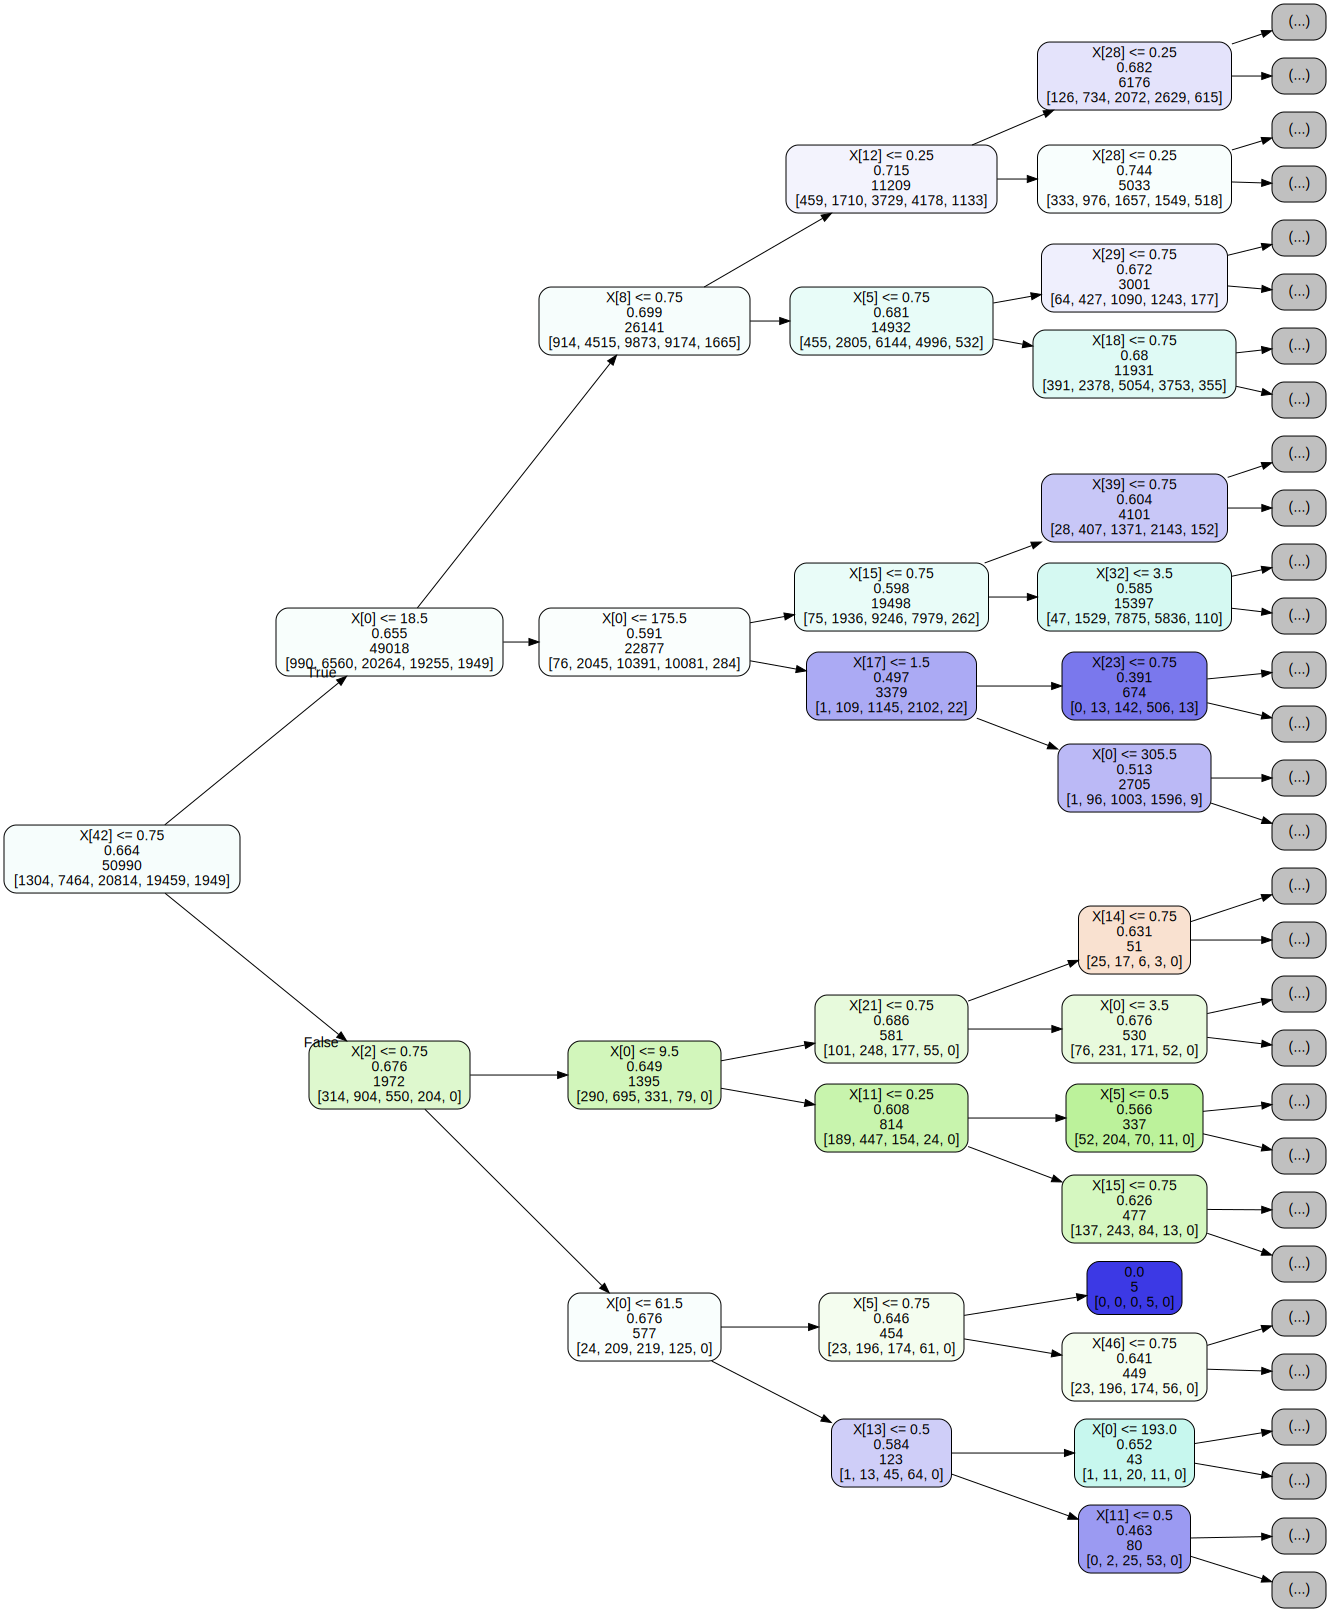

In [31]:
dot_data=export_graphviz(tree, out_file='Reg_Tree.dot',max_depth=4, label="none",rotate=True,filled=True,rounded=True)
with open("Reg_Tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format='png')

In [32]:
RFtree.fit(X_train, y_train)
RFtree.score(X_test, y_test)

0.070232287796730963

In [33]:
from sklearn.externals import joblib
joblib.dump(tree, 'regulartree.pkl') 
joblib.dump(RFtree, 'RFtree.pkl') 
joblib.dump(Boosttree, 'Boosttree.pkl') 
joblib.dump(ADAtree, 'ADAtree.pkl') 
joblib.dump(KNN, 'KNN.pkl')

['KNN.pkl']

**Result:**

Boosting has highest $R^2$ score

So, we decide to use boosting tree for our final webapp.

**Webapp: Restaurant Rating Engine**

Input: features of a restaurant

Output: predicted star rating for this restaurant

Webapp URL:
http://pdhe.pythonanywhere.com